# Set Up

In [56]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

ModuleNotFoundError: No module named 'tensorflow'

## Data Loading

In [49]:
data = pd.read_csv('../test_data_files/apple_stock_data.csv')

In [ ]:
# Select column to predict over
data = data.iloc[::-1].reset_index(drop=True)['Adj Close']
data

### Split the data

In [51]:
train_size = int(len(data)*0.8)
train_data, test_data = data[:train_size], data[train_size:]

In [ ]:
train_data, test_data

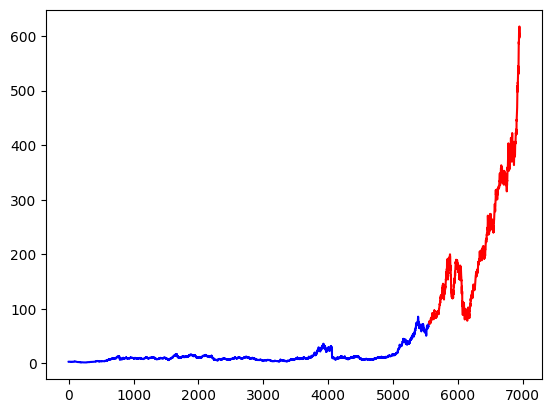

In [55]:
# Visualise Data
plt.plot(range(train_size), train_data, color='blue')
plt.plot(range(train_size, len(data)), test_data, color='red')
plt.show()

### Data Transformation

In [10]:
def min_max_scale(df, col_name: str):
    min_val = df[col_name].min()
    max_val = df[col_name].max()
    df[col_name] = (df[col_name] - min_val) / (max_val - min_val)
    return df, min_val, max_val


In [ ]:
# Scale the data to between 0-1
min_max_scale(train_data['Adj_Close'])
min_max_scale(test_data['Adj_Close'])

## Model Selection and Training

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_data.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))